# Proyecto 2. Introducción a la Inteligencia Artificial


*Universidad del Valle*


## Objetivo

- Aplicar el concepto de aprendizaje de máquina para resolver un problema de clasificación usando los métodos vistos en el curso.


## Actividades

1. Visite el sitio web de Kaggle y descargue el conjunto de datos con ejemplos de enfermedades de corazón https://www.kaggle.com/ronitf/heart-disease-uci (En este la columna objetivo es target) Deberían usar este.
2. Lea la descripción de los datos cuidadosamente.
3. Crear un notebook de Python (puede ser un kernel de Kaggle o un notebook local en Jupyter).
4. Cargar el conjunto de datos como un dataFrame de pandas. Realizar gráficos para cada una de las variables usando matplotlib. Las variables numéricas deben ser graficadas como histogramas y las variables categóricas deben ser representadas como diagramas de tortas. Luego es importante que previamente haya clasificado las variables en estos 2 grupos. Su visualización debe verse como las imágenes a continuación para sus variables numéricas y categóricas:
  
  
![Tux, the Linux mascot](./images/example.png)
  
  
5. Complete o remueva los elementos faltantes del conjunto de datos si existen.
6. Divida el conjunto de datos en 2: 80% para entrenamiento y 20% para pruebas
7. Entrene un modelo de árbol de decisión. Ajuste los parámetros necesarios para obtener un buen resultado. Reporte la precisión del modelo para el conjunto de entrenamiento y para el conjunto de prueba. También reporta la matriz de confusión para el conjunto de pruebas.
8. Realice una interpretación del modelo obtenido. Para esto puede imprimir el modelo obtenido por python. ¿Qué tan fácil es?.
9. Repita los pasos 7 y 8 para un modelo Naive Bayes y una Red Neuronal.
10. Compare los resultados de los 3 modelos usados en términos de la precisión, la estabilidad y la interpretabilidad de los resultados.
11. En su opinión, ¿Cuál de los 3 métodos usaría para resolver el problema de predecir enfermedades del corazón y porqué?.

# Let's start!

## Importing some libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype # Datatype converter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## Importing the dataset

In [2]:
df = pd.read_csv("./data/heart.csv")

## Printing out some basic information about the dataset

In [3]:
pd.set_option('display.max_columns', None) # Force to "print" all columns
print(df.columns)
print(df.shape)
df.head(10)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Variables representation and type of data of the dataset

* age: age in years
    * Datatype: numerical
        * Float
* sex:
    * Datatype: categorical
        * 0 = female
        * 1 = male
* cp: chest pain
    * Datatype: categorical
        * 1 = typical angina
        * 2 = atypical angina
        * 3 = non-anginal pain
        * 4 = asymptomatic
* trestbps: resting blood pressure (mm Hg)
    * Datatype: numerical
        * Float
* chol: person's cholesterol (mg/dl)
    * Datatype: numerical
        * Float
* fbs: person's fasting blood sugar (mg/dl)
    * Datatype: categorical
        * 0 = <= 120 mg/dl
        * 1 = > 120 mg/dl
* restecg: Resting electrocardiographic result
    * Datatype: categorical
        * 0 = normal
        * 1 = having ST-T wave abnormality
        * 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
    * Datatype: numerical
        * Float
* exang: exercise induced angina (1 = yes; 0 = no)
    * Datatype: categorical
        * 0 = no
        * 1 = yes
* oldpeak: ST depression induced by exercise relative to rest
    * Datatype: numerical
        * Float
* slope: slope of the peak exercise ST segment
    * Datatype: categorical
        * 1 = upsloping
        * 2 = flat
        * 3 = downsloping
* ca: number of major vessels (0-3) colored by flourosopy
    * Datatype: numerical
        * Float
* thal: blood disorder called thalassemia
    * Datatype: categorial
        * 3 = normal
        * 6 = fixed defect
        * 7 = reversable defect
* target: heart disease
    * Datatype: categorial
        * 0 = no
        * 1 = yes

In [4]:
numerical_data = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
categorical_data = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
# categorical_ordered_data = ['cp', 'restecg', 'slope']
# categorical_unordered_data = ['sex', 'fbs', 'exang', 'thal']

In [5]:
# for col in numerical_data:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# for col in categorical_ordered_data:
#     cat_type = CategoricalDtype(categories = None, ordered = True)
#     df[col] = df[col].astype(dtype = cat_type)

# for col in categorical_unordered_data:
#     cat_type = CategoricalDtype(categories = None, ordered = False)
#     df[col] = df[col].astype(dtype = cat_type)

In [6]:
description = df.describe()
description

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


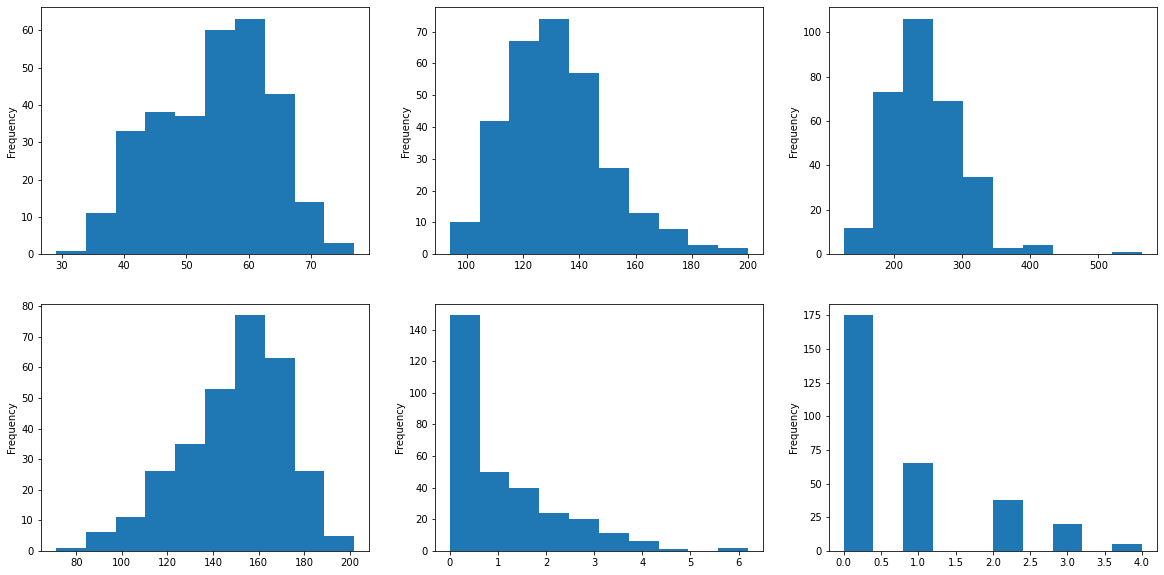

In [7]:
# Numerical data in histograms graphs
fig = plt.figure(figsize=(20, 10))
x = 1
for attr in numerical_data:
    ax = fig.add_subplot(2,3,x)
    df[attr].plot(kind='hist', ax=ax, rwidth=1)
    x = x + 1

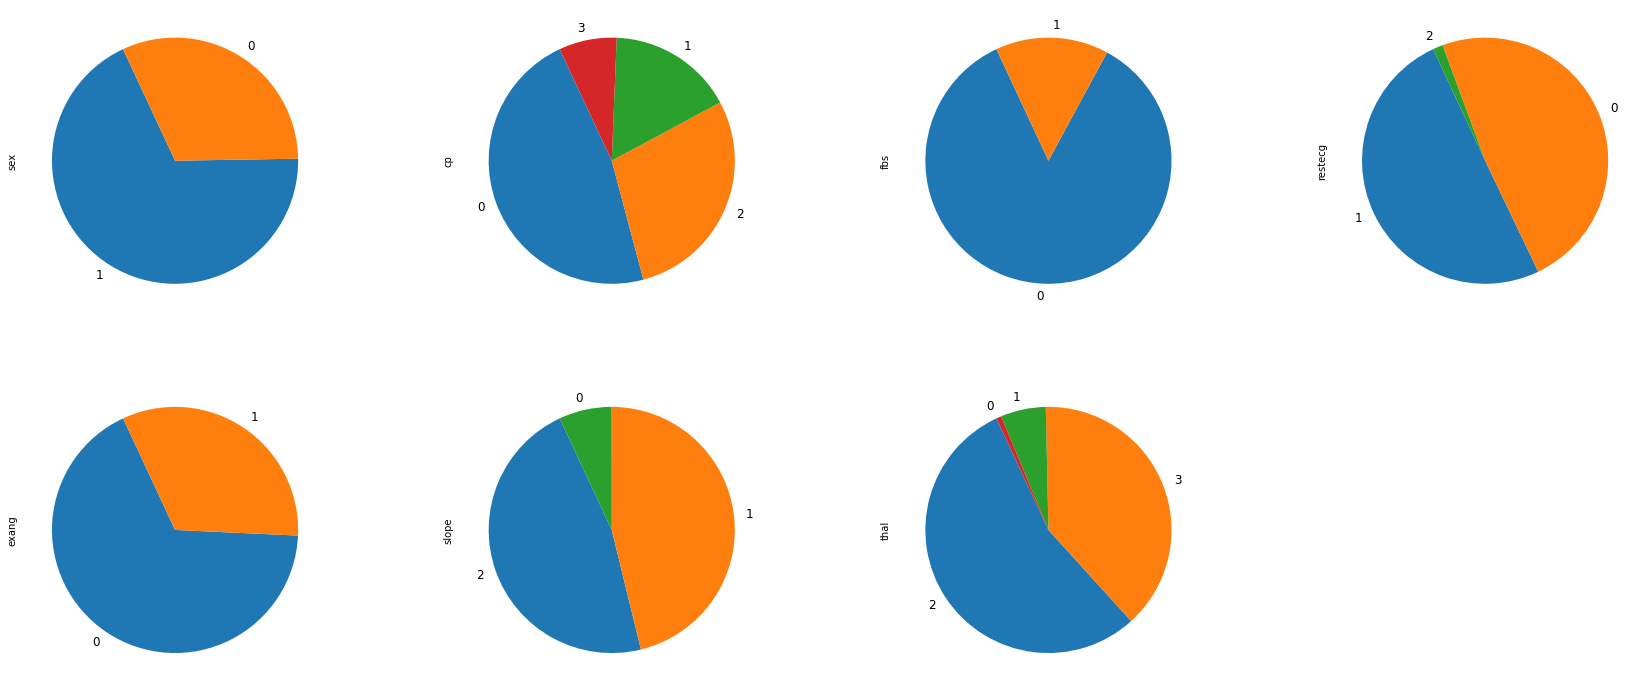

In [8]:
# Categorinal data in pie charts
fig = plt.figure(figsize=(30, 60))
x = 1
for attr in categorical_data:
    ax = fig.add_subplot(9,4,x)
    df[attr].value_counts().plot(kind='pie', ax=ax, startangle=115, fontsize=12)
    x = x + 1
plt.show()

In [9]:
# # Categorinal ordered data in pie charts
# fig = plt.figure(figsize=(30, 60))
# x = 1
# for attr in categorical_ordered_data:
#     ax = fig.add_subplot(1,3,x)
#     df[attr].value_counts().plot(kind='pie', ax=ax, startangle=115, fontsize=12)
#     x = x + 1
# plt.show()

In [10]:
# # Categorinal unordered data in pie charts
# fig = plt.figure(figsize=(30, 60))
# x = 1
# for attr in categorical_unordered_data:
#     ax = fig.add_subplot(6,3,x)
#     df[attr].value_counts().plot(kind='pie', ax=ax, startangle=115, fontsize=12)
#     x = x + 1
# plt.show()

## Dealing with missing data
This allow us to identify data that is incorrectly formatted like blank spaces, NA or even mixture of datatypes (i.e. a column with multiple data types like numbers and lettes)

In [11]:
df.dtypes # Print datatype for each column

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

If there is a column which have object datatype then it might have a missing value..

In [12]:
df['age'].unique() # Print all the unique values in the column age

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

If there is question mark '?' then that means it is a missing value. Print out the number of rows that contains those missing values

In [13]:
print(len(df.loc[(df['age'] == '?') | (df['sex'] == '?')]))

0


/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Now print out those rows (training examples) that contains the missing values

In [14]:
df.loc[(df['age'] == '?') | (df['sex'] == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Then we have to remove the rows with missing values

In [15]:
df_no_missing_values = df.loc[(df['age'] != '?') & (df['sex'] != '?')]
len(df_no_missing_values)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


303

Make sure 'age' and 'sex' no longer contains question marks

In [16]:
df_no_missing_values['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [17]:
df_no_missing_values['sex'].unique()

array([1, 0])

## Formatting the data: splitting the data into dependent and independent variables
- Dependent variable: X --> column data that is used to make the classification
- Independent variable: y --> column data that we want to predict (target: in this case, heart disease)

In [18]:
# Dependent variable X
X = df_no_missing_values.drop('target', axis=1).copy() # X = df_no_missing_values.iloc(:, :-1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
# Independent variable y
y = df_no_missing_values['target'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# Categorical data to binary values
To use categorical data with Scikit learn Decision trees we have to convert categorical data into multiple columns of binary values. The main idea is to treat every number as a separate category that is no more or less similar to any of the other categories.

In [25]:
# categorical_data with more than 2 categories: cp, restecg, slope, thal
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0


# Building the Classificaton Tree

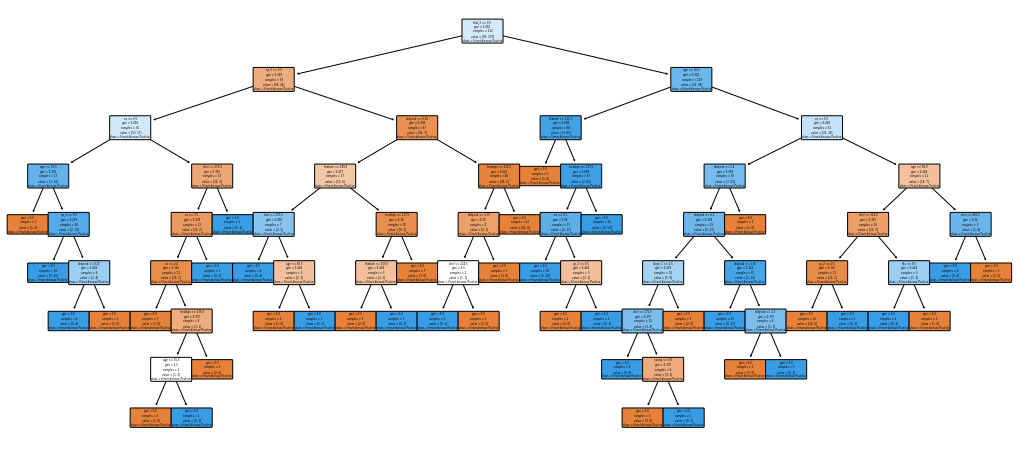

In [40]:
# Spliting the data into training and test sets
X_train, X_test, y_train, t_test = train_test_split(X_encoded, y, train_size = 0.7, test_size = 0.3)
decision_tree_model = DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(X_train, y_train)
plt.figure(figsize=(18, 8))
plot_tree(decision_tree_model,
          filled=True,
          rounded=True,
          class_names=['Heart disease Positive', 'Heart disease Positive'],
          feature_names=X_encoded.columns);